In [2]:
from numba import jit
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

def modlin(x,a,b):
    return a*x+b

import scipy.io as sio





Traj=[[]]
for s in ['1','2a','3','4','5','7','8','9','11']:
  test=sio.loadmat('Amoeba_Data/Amoeba'+s+'_vac_tracks.mat')
  X=test['track4xml'][:,0]
  Y=X=test['track4xml'][:,1]  
  T=test['track4xml'][:,4]
  Traj[-1].append(X[0])
  for k in range(1,len(X)):
        if T[k]!=T[k-1]:
            Traj.append([])
        Traj[-1].append(X[k])
  Traj.append([])
  Traj[-1].append(Y[0])
  for k in range(1,len(Y)):
        if T[k]!=T[k-1]:
            Traj.append([])
        Traj[-1].append(Y[k])

Trajf=[]
for p in Traj:
    if len(p)>2048:
        Trajf.append(p[:2048][:])
Traj=Trajf[:]

# (d)

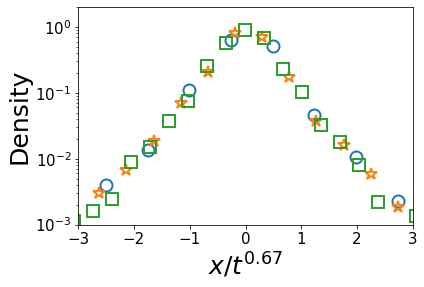

In [5]:
from scipy.stats import norm
i=0
Marker=['o','*','s','p']

H=0.67
for t in [20,40,80]:
    X=[]
    for Values in Traj:
      for ini in range(0,len(Values)-t):
        x0=Values[ini]
        X.append(Values[ini+t]-x0)
    h,bins=np.histogram(np.array(X)/t**0.67,density=True,bins=25)
    bins=(bins[1:]+bins[:-1])/2
    plt.plot(bins,h,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
    i+=1

plt.ylim(1e-3,2)
plt.xlim(-3,3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$x/t^{0.67}$',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.semilogy()
#plt.savefig('Gauss_vacuole.svg')
plt.show()    

# (d')

0.67


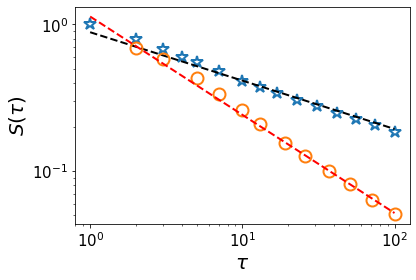

In [7]:

@jit(nopython=True)
def tau(V):
    tau=0
    M=V[0]
    while tau<len(V) and V[tau]<=M:
        tau+=1
    return tau

##
T=[]
T0=np.unique(np.int64(np.logspace(0,2,17)))
C=np.zeros(len(T0))
F=np.zeros(len(T0))
for Values in Traj:
  for k in range(0,len(Values)-2):
    t=tau(np.array(Values[k:]))
    C[T0<=(len(Values)-k)]+=1
    F[T0<=t]+=1

F/=C
##
from numba import jit
@jit(nopython=True)
def tau(V):
    T=[]
    M=V[0]
    tau=1
    for k in range(1,len(V)-1):
        if V[k]>M:
            T.append(tau)
            tau=1
        else:
            tau+=1
        M=max(V[k],M)
    return T

T=[]

#for k in range(len(Indices)-5):
#  T+=list(tau(Values[Indices[k]:Indices[k+5]]))
#print(len(T))

T=[]

for Values in Traj:
  #print(len(Values)//epochs)
  window=2000 
  T+=tau(np.array(Values))[1:]

@jit(nopython=True)
def FreCum(T,Tl):
    S=[]
    for t in Tl:
        S.append(np.sum(T>t)/len(T))
    return S

##
Tl=np.unique(np.int64(np.logspace(0,2,15)))
Tl=np.float64(Tl)

dw=1/H
i=0
Marker=['*','o','s','p']


plt.plot(T0,F,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
plt.plot(T0,(T0/T0[6])**(-1+H)*F[6],'--k',linewidth=2)
i+=1


S=np.array(FreCum(np.array(T),Tl))



plt.plot(Tl[1:],S[1:],Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0) 

plt.plot(Tl,(Tl/Tl[10])**(-H)*S[10],'--r',linewidth=2)



plt.semilogx()
plt.semilogy()

plt.xlabel(r'$\tau$',fontsize=20)
plt.ylabel(r'$S(\tau)$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.semilogx()
plt.semilogy()

#plt.savefig('Records_vacuoles.svg')
print(H)